# Introduction to stocDL: A Financial Deep-Learning library

## Data Collection: 
Importing stockDL and the required modules from the library. Here we have imported the data module which has various variables and functions related to the operations on data. 

In [2]:
import stockDL
from stockDL import data

Importing the stock data, from the data module of stockDL. 

In [3]:
sd_google = data.Data_Loader('GOOGL').df
sd_apple = data.Data_Loader('AAPL').df
sd_hdfc = data.Data_Loader('HDFCBANK.NS').df
sd_reliance = data.Data_Loader('RELIANCE.NS').df

In [4]:
sd_hdfc.head()

Open      High       Low     Close  Volume
Date                                                      
1996-01-01  2.458312  2.458312  2.373123  2.417746  350000
1996-01-02  2.417746  2.454255  2.393406  2.413689  412000
1996-01-03  2.413689  2.429916  2.393406  2.421802  284000
1996-01-04  2.421802  2.417746  2.385293  2.405576  282000
1996-01-05  2.405576  2.417746  2.393407  2.401520  189000

Candle plots for understanding the data. 

In [5]:
import plotly.graph_objects as go
import pandas as pd
import datetime

fig = go.Figure(data=[go.Candlestick(x=sd_hdfc.index[sd_hdfc.index > datetime.datetime(2015,10,20)],
                open=sd_hdfc['Open'],
                high=sd_hdfc['High'],
                low=sd_hdfc['Low'],
                close=sd_hdfc['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(height=600, width=800,
                  title_text="Candle ")
fig.update_layout(
    title={
        'text': "Candle Plot of HDFC (HDFCBANK.NS) from 20-10-2016 to 19-10-2021 ",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Times New Roman",
        size=18,
        color="Black"
        ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='Black'
        )
    ),
    yaxis=dict(
        title='Highest Price (in USD)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)
fig.show()

In [ ]:
import os

if not os.path.exists("data_plots"):
    os.mkdir("data_plots")
fig.write_image("data_plots/hdfc_candle.png")

### Data Sub-Plots:
Data sub-plots of the 4 stock symbols picked (GOOGL, AAPL, RELIANCE.NS, HDFC.NS)

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",subplot_titles=("Google (GOOGL in USD)", "Apple (AAPL in USD)", "HDFC (HDFCBANK.NS in INR)", "Reliance (RELIANCE.NS in INR)"))

fig.add_trace(go.Scatter(x=sd_google.index, y=sd_google['Open'], showlegend=False),
              row=1, col=1)

fig.add_trace(go.Scatter(x=sd_apple.index, y=sd_apple['Open'],showlegend=False),
              row=1, col=2)

fig.add_trace(go.Scatter(x=sd_hdfc.index, y=sd_hdfc['Open'], showlegend=False),
              row=2, col=1)

fig.add_trace(go.Scatter(x=sd_reliance.index, y=sd_reliance['Open'], showlegend=False),
              row=2, col=2)
    
fig.update_layout(
    title={
        'text': "Daily Opening Prices of The Chosen Stocks. ",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Times New Roman",
        size=18,
        color="Black"
        )
)

fig.show()

In [ ]:
import os

if not os.path.exists("data_plots"):
    os.mkdir("data_plots")
fig.write_image("data_plots/opening.png")

## Data Preprocessing: 
The precocessing module of stockDL handles the preprocessing task of the data which includes:
1. Removing outliers
2. Getting the opening data of first day of the month, as the trading stratergy is based on the opening amount of the day-1 to decide if we should stay in or move out. 
3. Sliding window of 6 years for training. 
4. Makes data RNN ready by scaling. 
5. Calculates the moving average as well.


In [7]:
from stockDL.preprocessing import data_preprocessing

In [8]:
md_google = data_preprocessing('GOOGL').df_monthly
md_apple = data_preprocessing('AAPL').df_monthly
md_hdfc = data_preprocessing('HDFCBANK.NS').df_monthly
md_reliance = data_preprocessing('RELIANCE.ns').df_monthly

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",subplot_titles=("Google (GOOGL in USD)", "Apple (AAPL in USD)", "HDFC (HDFCBANK.NS in INR)", "Reliance (RELIANCE.NS in INR)"))

fig.add_trace(go.Scatter(x=md_google.index, y=md_google['Open'], showlegend=False),
              row=1, col=1)

fig.add_trace(go.Scatter(x=md_apple.index, y=md_apple['Open'],showlegend=False),
              row=1, col=2)

fig.add_trace(go.Scatter(x=md_hdfc.index, y=md_hdfc['Open'], showlegend=False),
              row=2, col=1)

fig.add_trace(go.Scatter(x=md_reliance.index, y=md_reliance['Open'], showlegend=False),
              row=2, col=2)
    
fig.update_layout(
    title={
        'text': "Monthly Opening Prices of The Chosen Stocks",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Times New Roman",
        size=18,
        color="Black"
        )
)

fig.show()

In [ ]:
import os

if not os.path.exists("data_plots"):
    os.mkdir("data_plots")
fig.write_image("data_plots/opening_monthly.png")

### Data for training and testing the model:
This data is obtained by scaling the data (Removing Outliers) and by reshaping the data, so that it is LSTM Ready. 

In [10]:
X_google = data_preprocessing('GOOGL').X
X_apple = data_preprocessing('AAPL').X
X_hdfc = data_preprocessing('HDFCBANK.NS').X
X_reliance = data_preprocessing('RELIANCE.ns').X
y_google = data_preprocessing('GOOGL').y
y_apple = data_preprocessing('AAPL').y
y_hdfc = data_preprocessing('HDFCBANK.NS').y
y_reliance = data_preprocessing('RELIANCE.ns').y

In [ ]:
md_google

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
dg_google = pd.DataFrame(scaler.fit_transform(md_google[["High", "Low", "Open", "Close", "Volume", "First Day Current Month Opening",
                                                    "mv_avg_12", "mv_avg_24", "First Day Next Month Opening"]].values))
dg_hdfc =pd.DataFrame(scaler.fit_transform(md_hdfc[["High", "Low", "Open", "Close", "Volume", "First Day Current Month Opening",
                                                    "mv_avg_12", "mv_avg_24", "First Day Next Month Opening"]].values))
dg_apple =pd.DataFrame(scaler.fit_transform(md_apple[["High", "Low", "Open", "Close", "Volume", "First Day Current Month Opening",
                                                    "mv_avg_12", "mv_avg_24", "First Day Next Month Opening"]].values))
dg_reliance =pd.DataFrame(scaler.fit_transform(md_reliance[["High", "Low", "Open", "Close", "Volume", "First Day Current Month Opening",
                                                    "mv_avg_12", "mv_avg_24", "First Day Next Month Opening"]].values))

In [12]:
import plotly.graph_objects as go
import pandas as pd
import datetime

fig = go.Figure(data=[go.Candlestick(x=md_google.index[md_google.index > datetime.datetime(2015,10,20)],
                open=md_google['Open'],
                high=md_google['High'],
                low=md_google['Low'],
                close=md_google['Close'], name='GOOGLE (Candle Plot)'), 
                   go.Scatter(x=md_google.index[md_google.index > datetime.datetime(2015,10,20)], y=md_google['mv_avg_12'], line=dict(color='orange', width=1), name = 'SMA (12 mths)'),
                go.Scatter(x=md_google.index[md_google.index > datetime.datetime(2015,10,20)], y=md_google['mv_avg_24'], line=dict(color='green', width=1), name = 'SMA (24 mths)')])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(height=720, width=1000,title_text="Candle ")
fig.update_layout(
    title={
        'text': "Moving Average Plot for Google (GOOGL) from 20-10-2016 to 19-10-2021 ",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Times New Roman",
        size=18,
        color="Black"
        ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='Black'
        )
    ),
    yaxis=dict(
        title='Highest Price (in USD)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)
fig.show()

In [ ]:
import os

if not os.path.exists("data_plots"):
    os.mkdir("data_plots")
fig.write_image("data_plots/SMA_GOOGLE.png")

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",subplot_titles=("Google (GOOGL in USD)", "Apple (AAPL in USD)", "HDFC (HDFCBANK.NS in INR)", "Reliance (RELIANCE.NS in INR)"))

fig.add_trace(go.Scatter(x=md_google.index, y=dg_google[0], showlegend=False),
              row=1, col=1)

fig.add_trace(go.Scatter(x=md_apple.index, y=dg_apple[0],showlegend=False),
              row=1, col=2)

fig.add_trace(go.Scatter(x=md_hdfc.index, y=dg_hdfc[0], showlegend=False),
              row=2, col=1)

fig.add_trace(go.Scatter(x=md_reliance.index, y=dg_reliance[0], showlegend=False),
              row=2, col=2)

fig.update_layout(
    title={
        'text': "Normalised Prices of The Chosen Stocks (Ready for LSTM)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Times New Roman",
        size=18,
        color="Black"
        )
)

fig.show()

In [ ]:
import os

if not os.path.exists("data_plots"):
    os.mkdir("data_plots")
fig.write_image("data_plots/normalised.png")

### Model: (Stacked LSTMs, and Stacked LSTM-CNN Mix)

#### Stacked LSTMs:
This is the first algortihmic implementation for the problem statement, i.e. predicting the annual yield by investing in a particular stock using deep learning. 

In [14]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv1D, LSTM

In [27]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(300, input_shape=(5+1, 8), return_sequences=True))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(LSTM(200,  return_sequences=False))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
LSTM_model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
LSTM_model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

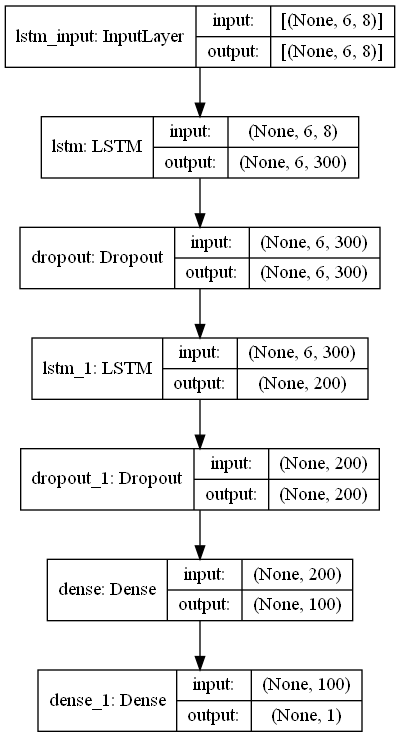

In [16]:
import keras
from tensorflow.keras.utils import plot_model
keras.utils.vis_utils.plot_model(
    LSTM_model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
    layer_range=None
)

In [28]:
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 6, 300)            370800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 300)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 791,801
Trainable params: 791,801
Non-trainable params: 0
________________________________________________

In [32]:
X_train = data_preprocessing('GOOGL').X_train
X_test = data_preprocessing('GOOGL').X_test
y_train = data_preprocessing('GOOGL').y_train
y_test = data_preprocessing('GOOGL').y_test

In [33]:
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                                         patience=25,
                                                         verbose=1,
                                                         factor=0.25,
                                                         min_lr=0.00001)
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True,
    write_images=True, write_steps_per_second=True, update_freq='epoch',
    profile_batch=2, embeddings_freq=0, embeddings_metadata=None
)
lstm_history = LSTM_model.fit(X_train, y_train, epochs=400,
                                                  batch_size=48, validation_data=(X_test,
                                                                                  y_test),
                                                  verbose=2, callbacks=[tensorboard, learning_rate_reduction], shuffle=False)

Epoch 1/400
3/3 - 1s - loss: 0.0031 - val_loss: 0.0465
Epoch 2/400
3/3 - 0s - loss: 0.0011 - val_loss: 0.0467
Epoch 3/400
3/3 - 0s - loss: 6.5806e-04 - val_loss: 0.0257
Epoch 4/400
3/3 - 0s - loss: 3.6426e-04 - val_loss: 0.0104
Epoch 5/400
3/3 - 0s - loss: 5.3068e-04 - val_loss: 0.0128
Epoch 6/400
3/3 - 0s - loss: 4.3105e-04 - val_loss: 0.0279
Epoch 7/400
3/3 - 0s - loss: 6.6777e-04 - val_loss: 0.0315
Epoch 8/400
3/3 - 0s - loss: 4.8273e-04 - val_loss: 0.0256
Epoch 9/400
3/3 - 0s - loss: 3.5251e-04 - val_loss: 0.0207
Epoch 10/400
3/3 - 0s - loss: 3.6868e-04 - val_loss: 0.0221
Epoch 11/400
3/3 - 0s - loss: 3.3628e-04 - val_loss: 0.0314
Epoch 12/400
3/3 - 0s - loss: 4.2462e-04 - val_loss: 0.0361
Epoch 13/400
3/3 - 0s - loss: 4.4163e-04 - val_loss: 0.0301
Epoch 14/400
3/3 - 0s - loss: 3.1556e-04 - val_loss: 0.0210
Epoch 15/400
3/3 - 0s - loss: 4.5723e-04 - val_loss: 0.0221
Epoch 16/400
3/3 - 0s - loss: 3.2430e-04 - val_loss: 0.0319
Epoch 17/400
3/3 - 0s - loss: 4.2158e-04 - val_loss: 0.03

ZeroDivisionError: float division by zero

In [39]:
md_google[["High", "Low", "Open", "Close", "Volume", "First Day Current Month Opening",
                                                    "mv_avg_12", "mv_avg_24", "First Day Next Month Opening"]].values

High          Low         Open        Close        Volume  \
Date                                                                           
2006-08-31   190.713540   187.303171   189.113462   188.733081  9.292611e+06   
2006-09-30   200.483984   196.733483   198.540791   198.729729  1.214298e+07   
2006-10-31   222.617845   217.897670   219.799343   220.487762  1.439595e+07   
2006-11-30   245.369892   240.896135   243.063539   243.059248  1.126875e+07   
2006-12-31   239.607608   235.492992   238.075826   236.985487  9.157253e+06   
...                 ...          ...          ...          ...           ...   
2021-05-31  2327.028003  2288.347498  2308.950488  2308.558008  1.508700e+06   
2021-06-30  2431.801336  2402.503196  2419.096802  2420.922718  1.238491e+06   
2021-07-31  2586.307129  2548.040969  2566.975237  2571.203323  1.454276e+06   
2021-08-31  2780.173628  2744.466331  2760.346824  2767.422297  1.048941e+06   
2021-09-30  2847.704776  2804.633336  2831.831927  2823.567150  1.406700e+06   

            First Day Current Month Opening    mv_avg_12    mv_avg_24  \
Date                                                                    
2006-08-31                       192.747742   188.046966   142.466110   
2006-09-30                       190.685684   191.850933   148.147829   
2006-10-31                       201.151154   195.740348   154.085170   
2006-11-30                       239.619614   200.599038   160.063411   
2006-12-31                       243.233231   204.225362   166.475557   
...                                     ...          ...          ...   
2021-05-31                      2364.909912  1715.940428  1482.032759   
2021-06-30                      2374.439941  1793.572552  1530.078802   
2021-07-31                      2434.500000  1875.851907  1585.614586   
2021-08-31                      2702.340088  1963.922646  1644.639104   
2021-09-30                      2900.000000  2065.624842  1710.337191   

            First Day Next Month Opening  
Date                                      
2006-08-31                    190.685684  
2006-09-30                    201.151154  
2006-10-31                    239.619614  
2006-11-30                    243.233231  
2006-12-31                    233.233231  
...                                  ...  
2021-05-31                   2374.439941  
2021-06-30                   2434.500000  
2021-07-31                   2702.340088  
2021-08-31                   2900.000000  
2021-09-30                   2688.949951  

[182 rows x 9 columns]

In [62]:
X = pd.DataFrame(scaler.fit_transform(md_google[:71][["High", "Low", "Open", "Close", "Volume", "First Day Current Month Opening",
                                                    "mv_avg_12", "mv_avg_24", "First Day Next Month Opening"]].values))
X = data_preprocessing('GOOGL').create_window(X, 6)
X = np.reshape(X.values, (-1, 7, 9))

In [74]:
X_train = X[:, :, 0:8]
y_train = X[:, :, 8]

In [78]:
test = pd.DataFrame(scaler.fit_transform(md_google[71:][["High", "Low", "Open", "Close", "Volume", "First Day Current Month Opening",
                                                    "mv_avg_12", "mv_avg_24", "First Day Next Month Opening"]].values))
test = data_preprocessing('GOOGL').create_window(test, 6)
test = np.reshape(test.values, (-1, 7, 9))

In [79]:
X_test = test[:, :, 0:8]
y_test = test[:, :, 8]

Epoch 1/400
